In [1]:
#importar dependencias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
path = 'C://Users//diego//Documents//New_studies//env_1_studies//env_1//Dataset//dataset_bike//'
df_day = pd.read_csv(path +'day.csv')
df_hour = pd.read_csv(path +'hour.csv')

In [3]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
print(df_day.columns)
print(df_day.isnull().sum())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_day.rename(columns={'instant':'id', 'dteday':'date', 'weathersit': 'weather_cond','yr':'year', 
                       'mnth':'month', 'hum':'humidity', 'cnt': 'count'}, inplace=True)

In [7]:
## função para fazer algumas modificações e tratamento nos dados (graficas e analise exploratorio)
def get_bike_data(bike):
    # Ler arquivo CSV
    
    
    # Convertir algumas columnas (etiquetas específicas)
    bike['weekday'] = pd.Categorical(bike['weekday'], categories=range(7), ordered=True)
    bike['weekday'] = bike['weekday'].cat.rename_categories(['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'])
    bike['holiday'] = pd.Categorical(bike['holiday'], categories=[0, 1], ordered=True)
    bike['holiday'] = bike['holiday'].cat.rename_categories(['NO HOLIDAY', 'HOLIDAY'])
    bike['workingday'] = pd.Categorical(bike['workingday'], categories=[0, 1], ordered=True)
    bike['workingday'] = bike['workingday'].cat.rename_categories(['NO WORKING DAY', 'WORKING DAY'])
    bike['season'] = pd.Categorical(bike['season'], categories=range(1, 5), ordered=True)
    bike['season'] = bike['season'].cat.rename_categories(['WINTER', 'SPRING', 'SUMMER', 'FALL'])
    bike['weather_cond'] = pd.Categorical(bike['weather_cond'], categories=range(1, 4), ordered=True)
    bike['weather_cond'] = bike['weather_cond'].cat.rename_categories(['GOOD', 'MISTY', 'RAIN/SNOW/STORM'])
    bike['month'] = pd.Categorical(bike['month'], categories=range(1, 13), ordered=True)
    bike['month'] = bike['month'].cat.rename_categories(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
    
    # Reemplazar valores
    bike.loc[bike['year'] == 0, 'year'] = 2011
    bike.loc[bike['year'] == 1, 'year'] = 2012
    bike['year'] = pd.Categorical(bike['year'])
    
    # Calcular dias desde pjaneiro primeiro de 2011
    bike['days_since_2011'] = (pd.to_datetime(bike['date']) - pd.to_datetime(bike['date']).min()).dt.days
    
    # Desnormalizar algumas características do clima
    bike['temp'] = bike['temp'] * (39 - (-8)) + (-8)
    bike['atemp'] = bike['atemp'] * (50 - (16)) + (16)
    bike['windspeed'] = 67 * bike['windspeed']
    bike['humidity'] = 100 * bike['humidity']
    
    # Seleccionar algunas columnas específicas
    return bike[['season','year', 'month', 'holiday','workingday','weather_cond','temp','humidity','windspeed','days_since_2011']]


## Olhemos um pouco...

In [8]:
df_day.describe()

,id,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


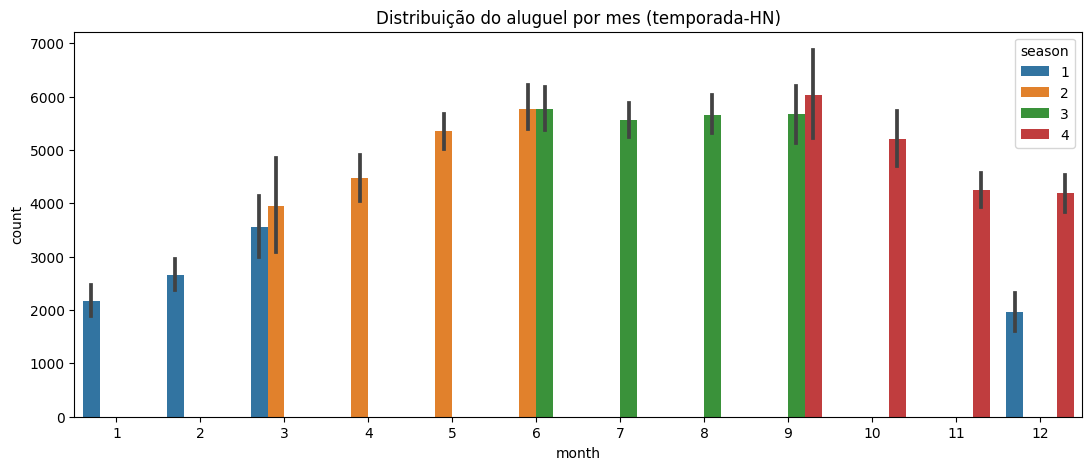

In [9]:
#um plot basico mas que dá muita informação
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(x='month',y='count',data=df_day[['month','count','season']],hue='season',ax=ax)
ax.set_title('Distribuição do aluguel por mes (temporada-HN)')
plt.show()

In [10]:
bike = df_day.copy()
X = get_bike_data(bike)
y = bike['count']

In [11]:
X.head()

,season,year,month,holiday,workingday,weather_cond,temp,humidity,windspeed,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,0
1,WINTER,2011,JAN,NO HOLIDAY,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,1
2,WINTER,2011,JAN,NO HOLIDAY,WORKING DAY,GOOD,1.229108,43.7273,16.636703,2
3,WINTER,2011,JAN,NO HOLIDAY,WORKING DAY,GOOD,1.400000,59.0435,10.739832,3
4,WINTER,2011,JAN,NO HOLIDAY,WORKING DAY,GOOD,2.666979,43.6957,12.522300,4


In [12]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: count, Length: 731, dtype: int64

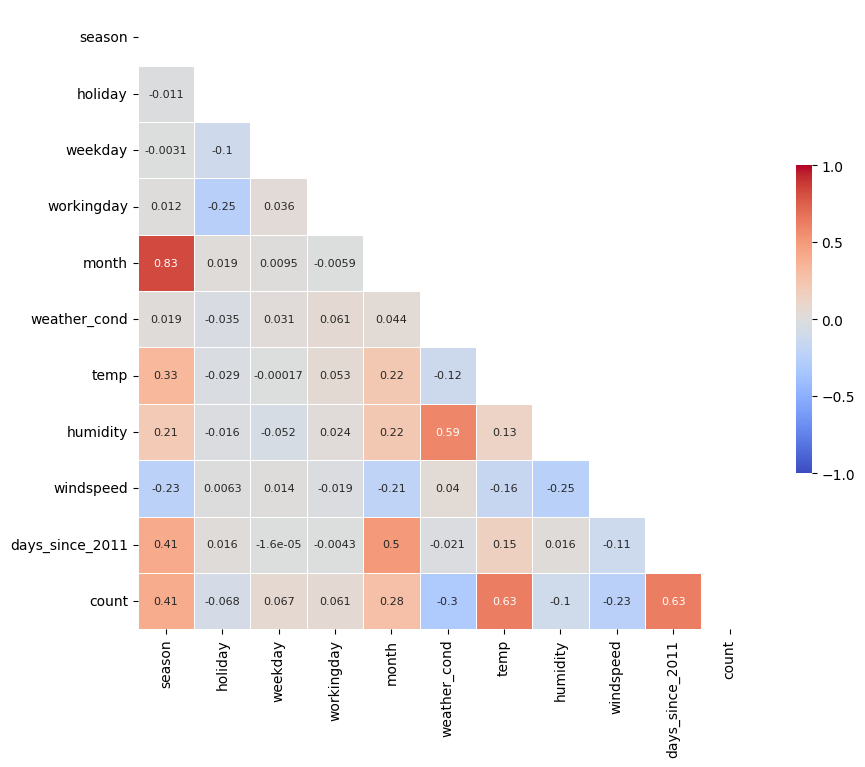

In [13]:
df_day['days_since_2011'] = (pd.to_datetime(df_day['date']) - pd.to_datetime(df_day['date']).min()).dt.days
matriz_correlacion = df_day[['season','holiday','weekday','workingday','month','weather_cond','temp','humidity','windspeed','days_since_2011', 'count']].corr()
mask = np.zeros_like(matriz_correlacion, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(matriz_correlacion,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":8})


ax.set_yticklabels(matriz_correlacion.columns, rotation = 0)
ax.set_xticklabels(matriz_correlacion.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Olhamos segundo a matriz de correlações que season, holiday, month, wheater_cond, temp, humidity e windspeed são as variaves mais interessantes a tratar para realizar os análises.

Porque não usar 'mounth'? se olhamos as graficas de correlações vemos que a variavel mounth esta muito correlacionada com a variavel season, logo queremos evitar efeitos de multicolinearidade, também vou evitar usar a variavel days_since_2011 para evitar um overtitting no modelo, mas será usada no analise estatístico.

### Variaves categoricas em função da variavel objetivo (count)

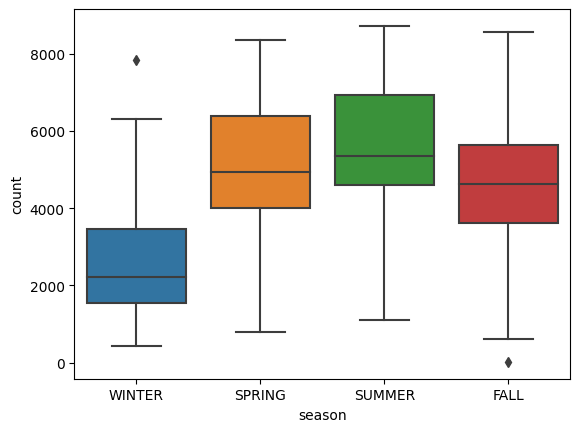

In [14]:
sns.boxplot(x='season', y='count', data=bike);
# o analisé é muito claro ao olhar a grafica, meses de mais aluguel; as temporadas de primaveira e verão, caindo a partir de otono e menos aluguel na temporada de inverno

<Axes: xlabel='holiday', ylabel='count'>

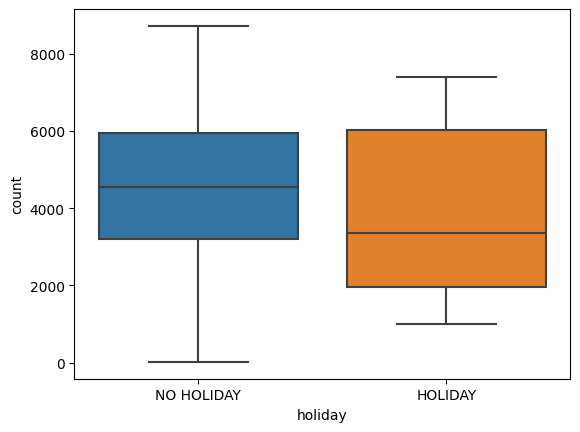

In [15]:
sns.boxplot(x='holiday', y = 'count', data=bike)
# vemos que há uma disminução notavel nos dias feriados comparados aos não feriados (feriados nos Estados Unidos)

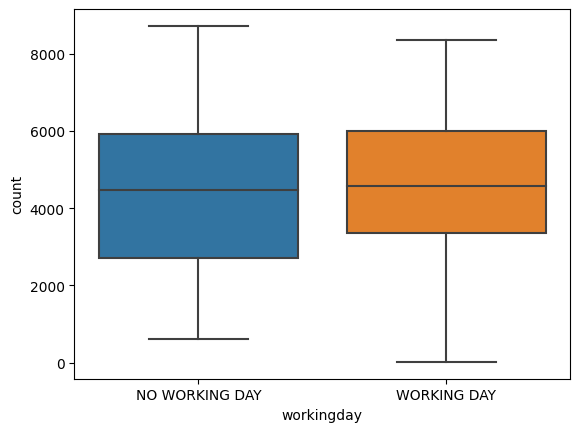

In [16]:
sns.boxplot(x = 'workingday', y ='count', data=bike);
# essa aqui é muito interessante pois mostra que não há maior diferencia no aluguel de bikes quando é dia util ou final de semana

<Axes: xlabel='weather_cond', ylabel='count'>

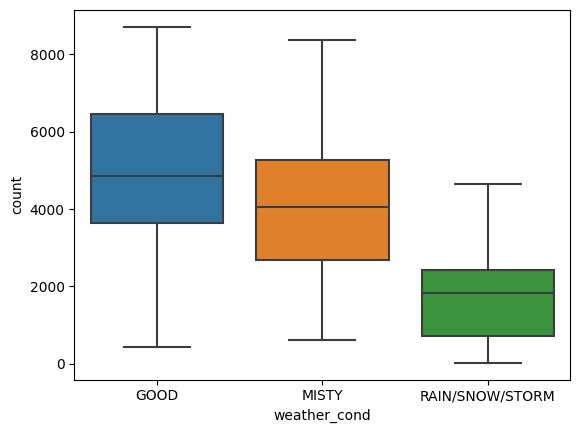

In [17]:
sns.boxplot(x = 'weather_cond', y='count', data=bike)
# essa aqui támbem mostra boa informação, pois relaciona o clima com a quantidade de bikes alugadas, vemos que os dias quentes tem as maiores numeros de aluguel, o dias con nevoa támbem tem boas cifras
# enquanto os dias de chuva, tormenta ou neve não sao os dias de mais aluguel

# como exercicio podemos olhar as relações desta variavel com humidity y temperatura

<Axes: xlabel='weekday', ylabel='count'>

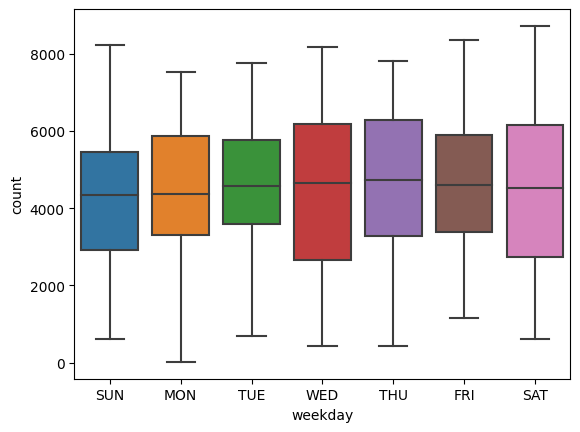

In [18]:
sns.boxplot(x ='weekday', y = 'count', data=bike)
# com este boxplot podemos olhar que não há uma diferença notavel entre os dias da semana, junto com variavel workday poderia estar nos entregando a mesma informação,
# portanto, deixaremos de lado por enquanto 

## Modelagem

Vamos construir as bases de treino e teste


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
print(f"O dataset de trenamento tem {len(X_train)} observações")
print(f"O dataset de evaluação tem {len(X_test)} observações")

O dataset de trenamento tem 584 observações
O dataset de evaluação tem 147 observações


In [21]:
X_train.head()

,season,year,month,holiday,workingday,weather_cond,temp,humidity,windspeed,days_since_2011
97,SPRING,2011,APR,NO HOLIDAY,WORKING DAY,MISTY,7.784151,83.6250,15.208464,97
503,SPRING,2012,MAY,NO HOLIDAY,WORKING DAY,GOOD,18.515849,52.3333,9.166739,503
642,FALL,2012,OCT,NO HOLIDAY,WORKING DAY,MISTY,22.902500,72.2917,7.875582,642
498,SPRING,2012,MAY,NO HOLIDAY,NO WORKING DAY,GOOD,20.787500,57.6250,15.082839,498
303,FALL,2011,OCT,NO HOLIDAY,WORKING DAY,GOOD,7.980000,70.3333,7.125450,303


## Modelo 1. (temperatura, humedade e velocidade do vento, variaveis numericas)

Primeiro vamos construir um modelo e olhar as metricas correspondentes usando sómente as variaveis numericas que sengundo vimos na matrix de correlação são as mais relacionadas com a variavel objetivo. 

In [22]:
variaveis_exogenas = ['temp', 'humidity', 'windspeed']
# Construimos la matriz de X
X_train_modelo_thv = X_train[variaveis_exogenas]


In [23]:
# Importamos o modelo linear
from sklearn.linear_model import LinearRegression
# Definimos uma instancia do modelo linear com scikit learn
modelo_lineal_thv = LinearRegression(fit_intercept=True)
# Realizamos o processo de estimação
modelo_lineal_thv.fit(X_train_modelo_thv, y_train)

LinearRegression()

In [24]:
# Definimos una función para obtener los coeficientes en un dataframe
def obter_coeficientes(modelo, ls_variaveis):
    '''Crea un dataframe con los coeficientes estimados de un modelo'''
    # Creo la lista de nombres de variables
    ls_variaveis = ['intercepto'] + ls_variaveis
    # Intercepto
    intercepto = modelo.intercept_
    # Lista coeficientes excepto el intercepto
    coeficientes = list(modelo.coef_)
    # Lista completa coeficientes
    ls_coeficientes = [intercepto] + coeficientes
    return pd.DataFrame({"variable": ls_variaveis, "coeficiente": ls_coeficientes})

In [25]:
# Obtenemos nuestro dataframe 
coeficientes_modelo_thv = obter_coeficientes(modelo_lineal_thv, variaveis_exogenas)
coeficientes_modelo_thv

,variable,coeficiente
0,intercepto,5374.036059
1,temp,140.474745
2,humidity,-32.620491
3,windspeed,-76.024125


vemos que por cada grado de temperatura, el aluguel aumenta em 140, támbem vemos que o impacto da humidade e a velocidade do vento é negativo.

In [26]:
# Importamos as métricas desde scikit-learn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_thv= modelo_lineal_thv.predict(X_train_modelo_thv)


In [27]:
# definimos melhor uma função para obter as metricas
def obter_metricas_performance(y_verdadera, y_predicha, tipo_dataset):
    r2 = r2_score(y_verdadera, y_predicha) # Calculamos R quadrado
    mse = mean_squared_error(y_verdadera, y_predicha) #calculamos MSE
    rmse = np.sqrt(mse) # a raiz de MSE
    mae = mean_absolute_error(y_verdadera, y_predicha)# calculamos MAE
    return pd.DataFrame({'metrica': ['R2', 'MSE', 'RMSE', 'MAE'],
                         'valor':[r2, mse, rmse, mae],
                         'tipo_dataset':tipo_dataset})

obter_metricas_performance(y_train, y_train_thv, 'treino')

,metrica,valor,tipo_dataset
0,R2,4.813589e-01,treino
1,MSE,1.877485e+06,treino
2,RMSE,1.370214e+03,treino
3,MAE,1.116585e+03,treino


In [28]:
# Criamos a matrix de X_test
X_test_thv= X_test[variaveis_exogenas]
# Predecimos los valores
y_test_thv =  modelo_lineal_thv.predict(X_test_thv)
# Obtenemos nuestro dataframe de métricas de performance
performance_test_thv =obter_metricas_performance(y_test, y_test_thv, 'evaluação')
performance_train_thv =obter_metricas_performance(y_train, y_train_thv, 'treino')
# Mostramos en conjunto las métricas para entrenamiento y evaluación
pd.concat([performance_train_thv, performance_test_thv])

,metrica,valor,tipo_dataset
0,R2,4.813589e-01,treino
1,MSE,1.877485e+06,treino
2,RMSE,1.370214e+03,treino
3,MAE,1.116585e+03,treino
0,R2,3.905734e-01,evaluação
1,MSE,2.591978e+06,evaluação
2,RMSE,1.609962e+03,evaluação
3,MAE,1.349023e+03,evaluação


### Modelo 2. Variavel Categorica (Season)

Olhando as graficas acima vamos usar as variaveis categoricas de weathersit (clima), season (temporada) e dia feriado (holiday)

In [29]:
from sklearn.preprocessing import OneHotEncoder
# Definimos a intancia do transformer
one_hot_encoder = OneHotEncoder(categories=[['WINTER', 'SPRING','SUMMER', 'FALL']]) # não dropeamos a primeira para não perder a simetria da representação original
# Realizamos el fit con los datos de entrenamiento
one_hot_encoder.fit(X_train[['season']])
# Accedemos a las categorias del encoder
one_hot_encoder.categories_
# Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
matriz_dummies = one_hot_encoder.transform(X_train[['season']]).toarray()
matriz_dummies

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [30]:
nombres_dummies = ['season_winter', 'season_spring', 'season_summer', 'season_fall']
# Generamos el dataframe con las variables dummies con las matrices y columnas
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=X_train.index)
df_dummies.head()

,season_winter,season_spring,season_summer,season_fall
97,0.0,1.0,0.0,0.0
503,0.0,1.0,0.0,0.0
642,0.0,0.0,0.0,1.0
498,0.0,1.0,0.0,0.0
303,0.0,0.0,0.0,1.0


In [31]:
X_train = X_train.join(df_dummies)
X_train.head()

,season,year,month,holiday,workingday,weather_cond,temp,humidity,windspeed,days_since_2011,season_winter,season_spring,season_summer,season_fall
97,SPRING,2011,APR,NO HOLIDAY,WORKING DAY,MISTY,7.784151,83.6250,15.208464,97,0.0,1.0,0.0,0.0
503,SPRING,2012,MAY,NO HOLIDAY,WORKING DAY,GOOD,18.515849,52.3333,9.166739,503,0.0,1.0,0.0,0.0
642,FALL,2012,OCT,NO HOLIDAY,WORKING DAY,MISTY,22.902500,72.2917,7.875582,642,0.0,0.0,0.0,1.0
498,SPRING,2012,MAY,NO HOLIDAY,NO WORKING DAY,GOOD,20.787500,57.6250,15.082839,498,0.0,1.0,0.0,0.0
303,FALL,2011,OCT,NO HOLIDAY,WORKING DAY,GOOD,7.980000,70.3333,7.125450,303,0.0,0.0,0.0,1.0


In [32]:
X_train.season.value_counts()

SPRING    152
SUMMER    146
FALL      146
WINTER    140
Name: season, dtype: int64

In [33]:
# Definimos las variables exogenas (predictores)
variables_exogenas = ['temp', 'humidity', 'windspeed',  'season_winter', 'season_spring', 'season_summer', 'season_fall' ]

# Construimos la matriz de X
X_train_modelo_season = X_train[variables_exogenas]

# Definimos una instancia del modelo lineal con scikit learn
modelo_lineal_season = LinearRegression(fit_intercept=True)

# Realizamos el proceso de estimación
modelo_lineal_season.fit(X_train_modelo_season, y_train)

coeficientes_modelo_season = obter_coeficientes(modelo_lineal_season, variables_exogenas)
coeficientes_modelo_season

,variable,coeficiente
0,intercepto,5679.194051
1,temp,140.782995
2,humidity,-39.262823
3,windspeed,-68.389169
4,season_winter,-609.627507
5,season_spring,123.204531
6,season_summer,-252.273174
7,season_fall,738.696149


In [34]:
y_train_season = modelo_lineal_season.predict(X_train_modelo_season)


In [35]:
obter_metricas_performance(y_train, y_train_season, 'treino')

,metrica,valor,tipo_dataset
0,R2,5.458573e-01,treino
1,MSE,1.644000e+06,treino
2,RMSE,1.282186e+03,treino
3,MAE,1.074503e+03,treino


In [36]:
one_hot_encoder = OneHotEncoder(categories=[['WINTER', 'SPRING','SUMMER', 'FALL']])
# Realizamos el fit con los datos de entrenamiento
one_hot_encoder.fit(X_test[['season']])
# Accedemos a las categorias del encoder
one_hot_encoder.categories_
# Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
matriz_dummies = one_hot_encoder.transform(X_test[['season']]).toarray()
matriz_dummies


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],


In [37]:
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=X_test.index)

In [38]:
df_dummies

,season_winter,season_spring,season_summer,season_fall
196,0.0,0.0,1.0,0.0
187,0.0,0.0,1.0,0.0
14,1.0,0.0,0.0,0.0
31,1.0,0.0,0.0,0.0
390,1.0,0.0,0.0,0.0
...,...,...,...,...
566,0.0,0.0,1.0,0.0
688,0.0,0.0,0.0,1.0
266,0.0,0.0,0.0,1.0
504,0.0,1.0,0.0,0.0


In [39]:
X_test= X_test.join(df_dummies)

In [40]:
X_test.tail()

,season,year,month,holiday,workingday,weather_cond,temp,humidity,windspeed,days_since_2011,season_winter,season_spring,season_summer,season_fall
566,SUMMER,2012,JUL,NO HOLIDAY,WORKING DAY,MISTY,23.294151,84.4167,14.000789,566,0.0,0.0,1.0,0.0
688,FALL,2012,NOV,NO HOLIDAY,WORKING DAY,MISTY,9.899151,62.3333,15.749489,688,0.0,0.0,0.0,1.0
266,FALL,2011,SEP,NO HOLIDAY,NO WORKING DAY,MISTY,20.513349,86.2500,5.251681,266,0.0,0.0,0.0,1.0
504,SPRING,2012,MAY,NO HOLIDAY,NO WORKING DAY,GOOD,20.200000,45.6250,5.626325,504,0.0,1.0,0.0,0.0
239,SUMMER,2011,AUG,NO HOLIDAY,NO WORKING DAY,GOOD,25.231773,56.1765,20.412153,239,0.0,0.0,1.0,0.0


In [41]:
X_test_season= X_test[variables_exogenas]
X_test_season.head()

,temp,humidity,windspeed,season_winter,season_spring,season_summer,season_fall
196,24.273349,58.5000,13.958914,0.0,0.0,1.0,0.0
187,27.250000,65.1250,10.666400,0.0,0.0,1.0,0.0
14,2.966651,49.8750,10.583521,1.0,0.0,0.0,0.0
31,1.032178,82.9565,3.565271,1.0,0.0,0.0,0.0
390,8.058349,76.9583,4.917519,1.0,0.0,0.0,0.0


In [42]:
# Predecimos los valores
y_test_season =  modelo_lineal_season.predict(X_test_season)
# Obtenemos nuestro dataframe de métricas de performance
performance_test_season =obter_metricas_performance(y_test, y_test_season, 'evaluação')
performance_train_season =obter_metricas_performance(y_train, y_train_season, 'treino')
# Mostramos en conjunto las métricas para entrenamiento y evaluación
pd.concat([performance_train_season, performance_test_season])

,metrica,valor,tipo_dataset
0,R2,5.458573e-01,treino
1,MSE,1.644000e+06,treino
2,RMSE,1.282186e+03,treino
3,MAE,1.074503e+03,treino
0,R2,4.931763e-01,evaluação
1,MSE,2.155594e+06,evaluação
2,RMSE,1.468194e+03,evaluação
3,MAE,1.252894e+03,evaluação


### Modelo 3. Variaveis Categorica (season e weather_cond)

In [43]:
X_train.weather_cond.value_counts()

GOOD               373
MISTY              196
RAIN/SNOW/STORM     15
Name: weather_cond, dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder
# Definimos a intancia do transformer
one_hot_encoder = OneHotEncoder(categories=[['MISTY', 'GOOD','RAIN/SNOW/STORM']]) # não dropeamos a primeira para não perder a simetria da representação original
# Realizamos el fit con los datos de entrenamiento
one_hot_encoder.fit(X_train[['weather_cond']])
# Accedemos a las categorias del encoder
one_hot_encoder.categories_
# Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
matriz_dummies = one_hot_encoder.transform(X_train[['weather_cond']]).toarray()
matriz_dummies

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [45]:
nombres_dummies = ['cond_misty', 'cond_good', 'cond_rss']
# Generamos el dataframe con las variables dummies con las matrices y columnas
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=X_train.index)
df_dummies.head()

,cond_misty,cond_good,cond_rss
97,1.0,0.0,0.0
503,0.0,1.0,0.0
642,1.0,0.0,0.0
498,0.0,1.0,0.0
303,0.0,1.0,0.0


In [46]:
X_train = X_train.join(df_dummies)
X_train.head()

,season,year,month,holiday,workingday,weather_cond,temp,humidity,windspeed,days_since_2011,season_winter,season_spring,season_summer,season_fall,cond_misty,cond_good,cond_rss
97,SPRING,2011,APR,NO HOLIDAY,WORKING DAY,MISTY,7.784151,83.6250,15.208464,97,0.0,1.0,0.0,0.0,1.0,0.0,0.0
503,SPRING,2012,MAY,NO HOLIDAY,WORKING DAY,GOOD,18.515849,52.3333,9.166739,503,0.0,1.0,0.0,0.0,0.0,1.0,0.0
642,FALL,2012,OCT,NO HOLIDAY,WORKING DAY,MISTY,22.902500,72.2917,7.875582,642,0.0,0.0,0.0,1.0,1.0,0.0,0.0
498,SPRING,2012,MAY,NO HOLIDAY,NO WORKING DAY,GOOD,20.787500,57.6250,15.082839,498,0.0,1.0,0.0,0.0,0.0,1.0,0.0
303,FALL,2011,OCT,NO HOLIDAY,WORKING DAY,GOOD,7.980000,70.3333,7.125450,303,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [47]:
# Definimos las variables exogenas (predictores)
variaveis_exogenas_3 = ['temp', 'humidity', 'windspeed',  'season_winter', 'season_spring', 'season_summer', 'season_fall', 'cond_misty', 'cond_good', 'cond_rss']

# Construimos la matriz de X
X_train_modelo_sc = X_train[variaveis_exogenas_3]

# Definimos una instancia del modelo lineal con scikit learn
modelo_lineal_sc = LinearRegression(fit_intercept=True)

# Realizamos el proceso de estimación
modelo_lineal_sc.fit(X_train_modelo_sc, y_train)

coeficientes_modelo_sc = obter_coeficientes(modelo_lineal_sc, variaveis_exogenas_3)
coeficientes_modelo_sc

,variable,coeficiente
0,intercepto,4625.844017
1,temp,137.187872
2,humidity,-31.959660
3,windspeed,-56.939919
4,season_winter,-641.828488
5,season_spring,109.720708
6,season_summer,-226.561992
7,season_fall,758.669772
8,cond_misty,535.383123
9,cond_good,555.708259


Os impactos mais notaveis se obten em condições climaticas de chuva, tormenta ou neve e em condições boas ou com nevoa tem um impacto positivo no aluguel de bikes, támbem vemos um impacto negativo na variavel objetivo da season inverno e no verão cuando a temperatura é muito alta (lembrando que o peso da temperatura é positivo: 137)

In [48]:
y_train_sc = modelo_lineal_sc.predict(X_train_modelo_sc)

In [49]:
obter_metricas_performance(y_train, y_train_sc, 'treino')

,metrica,valor,tipo_dataset
0,R2,5.612497e-01,treino
1,MSE,1.588280e+06,treino
2,RMSE,1.260270e+03,treino
3,MAE,1.065283e+03,treino


In [50]:
one_hot_encoder = OneHotEncoder(categories=[['MISTY', 'GOOD','RAIN/SNOW/STORM']])
# Realizamos el fit con los datos de entrenamiento
one_hot_encoder.fit(X_test[['weather_cond']])
# Accedemos a las categorias del encoder
one_hot_encoder.categories_
# Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
matriz_dummies = one_hot_encoder.transform(X_test[['weather_cond']]).toarray()
matriz_dummies

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0

In [51]:
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=X_test.index)

In [52]:
X_test= X_test.join(df_dummies)

In [53]:
X_test_sc= X_test[variaveis_exogenas_3]
X_test_sc.head()

,temp,humidity,windspeed,season_winter,season_spring,season_summer,season_fall,cond_misty,cond_good,cond_rss
196,24.273349,58.5000,13.958914,0.0,0.0,1.0,0.0,0.0,1.0,0.0
187,27.250000,65.1250,10.666400,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14,2.966651,49.8750,10.583521,1.0,0.0,0.0,0.0,1.0,0.0,0.0
31,1.032178,82.9565,3.565271,1.0,0.0,0.0,0.0,1.0,0.0,0.0
390,8.058349,76.9583,4.917519,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
# Predecimos los valores
y_test_sc =  modelo_lineal_sc.predict(X_test_sc)
# Obtenemos nuestro dataframe de métricas de performance
performance_test_sc =obter_metricas_performance(y_test, y_test_sc, 'teste')
performance_train_sc =obter_metricas_performance(y_train, y_train_sc, 'treino')
# Mostramos en conjunto las métricas para entrenamiento y evaluación
pd.concat([performance_train_sc, performance_test_sc])

,metrica,valor,tipo_dataset
0,R2,5.612497e-01,treino
1,MSE,1.588280e+06,treino
2,RMSE,1.260270e+03,treino
3,MAE,1.065283e+03,treino
0,R2,5.272315e-01,teste
1,MSE,2.010752e+06,teste
2,RMSE,1.418010e+03,teste
3,MAE,1.234405e+03,teste


Vemos que não há um problema de overfitting (não há caida forte entre a performance de base de treino e teste) que usualmente aparece em problemas de regressão linear

## Vamos fazer um test estatístico

Aqui vamos nos basear no exemplo do livro: Interpetable Machine Learning de Christoph Molnar

In [55]:
import statsmodels.formula.api as smf
import pandas as pd

bike_features_of_interest = ['season','holiday', 'workingday', 'weather_cond', 'temp', 'humidity', 'windspeed', 'days_since_2011']
# Ajustar o modelo de regressão linear
formula = 'count ~ ' + ' + '.join(bike_features_of_interest)
mod = smf.ols(formula=formula, data=bike).fit()

# Obtener un resumen del modelo ajustado
lm_summary = mod.summary2().tables[1]

# # Mostrar el resumen en una tabla
lm_summary_print = lm_summary[['Coef.', 'Std.Err.', 't']]
lm_summary_print.columns = ['Weight', 'SE', '|t|']
lm_summary_print['|t|'] = lm_summary_print['|t|'].abs()
display(lm_summary_print);

C:\Users\diego\AppData\Local\Temp\ipykernel_28168\358017338.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lm_summary_print['|t|'] = lm_summary_print['|t|'].abs()


,Weight,SE,|t|
Intercept,2399.442211,238.306592,10.068719
season[T.SPRING],899.318156,122.283253,7.354385
season[T.SUMMER],138.215432,161.703690,0.854745
season[T.FALL],425.602853,110.819879,3.840492
holiday[T.HOLIDAY],-686.115442,203.301472,3.374867
workingday[T.WORKING DAY],124.920938,73.266572,1.705020
weather_cond[T.MISTY],-379.398530,87.553162,4.333350
weather_cond[T.RAIN/SNOW/STORM],-1901.539915,223.639973,8.502684
temp,110.709582,7.043267,15.718498
humidity,-17.377199,3.169416,5.482776


voce pode fazer interpretações muito interesantes dos resultados, por exemplo: olhar a variavel temperatura, a situação climatica (chuvas forte ou tormentas), a variavel feriado e clima com nevoa.

Todas as interpretações sempre vêm com a nota de rodapé de que "todos os outros recursos permanecem os mesmos". Isso se deve à natureza dos modelos de regressão linear.

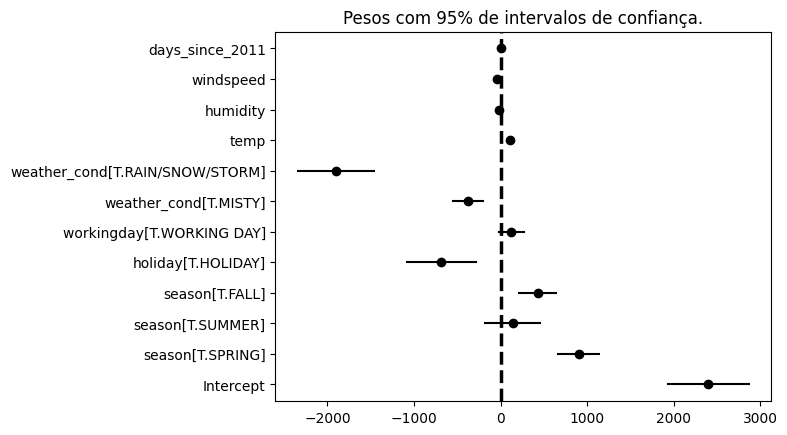

In [56]:
import matplotlib.pyplot as plt


coefs = mod.params
std_errs = mod.bse

# Calcular los límites del intervalo de confianza del 95%
lower = coefs - 1.96 * std_errs
upper = coefs + 1.96 * std_errs

# Crear la figura y el eje
fig, ax = plt.subplots()

# Dibujar los puntos y las líneas
ax.scatter(coefs, range(len(coefs)), color='black')
for i, (l, u) in enumerate(zip(lower, upper)):
    ax.plot([l, u], [i, i], color='black')

# Establecer las etiquetas del eje y
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(mod.params.index)
plt.axvline(x=0, c='black', ls='--', linewidth=2.5)

# Añadir título y leyenda
ax.set_title("Pesos com 95% de intervalos de confiança.")

# Mostrar la gráfica
plt.show()

O gráfico de peso mostra que o tempo chuvoso/nevado/tempestuoso tem um forte efeito negativo sobre o número previsto de bicicletas. O peso da característica dia útil é próximo de zero e zero está incluído no intervalo de 95%, o que significa que o efeito não é estatisticamente significativo

In [57]:
mod.summary().tables[0]

Dep. Variable:,count,R-squared:,0.794
Model:,OLS,Adj. R-squared:,0.790
Method:,Least Squares,F-statistic:,251.2
Date:,"Thu, 10 Aug 2023",Prob (F-statistic):,1.05e-237
Time:,18:37:59,Log-Likelihood:,-5993.0
No. Observations:,731,AIC:,1.201e+04
Df Residuals:,719,BIC:,1.207e+04
Df Model:,11,,
Covariance Type:,nonrobust,,


### Modelo 4. Extra

Vamos agregar uma variavel (days_since_2011) que posivelmente vai overfitar os resultados e sera mais parecido a o modelo estatistico do statsmodels (mas não vai servir como predictor)

In [58]:
# Definimos las variables exogenas (predictores)
variaveis_exogenas_4 = ['temp', 'humidity', 'windspeed',  'days_since_2011', 'season_winter', 'season_spring', 'season_summer', 'season_fall', 'cond_misty', 'cond_good', 'cond_rss']

# Construimos la matriz de X
X_train_modelo_2011 = X_train[variaveis_exogenas_4]

# Definimos una instancia del modelo lineal con scikit learn
modelo_lineal_2011 = LinearRegression(fit_intercept=True)

# Realizamos el proceso de estimación
modelo_lineal_2011.fit(X_train_modelo_2011, y_train)

coeficientes_modelo_2011 = obter_coeficientes(modelo_lineal_2011, variaveis_exogenas_4)
coeficientes_modelo_2011

,variable,coeficiente
0,intercepto,2208.972112
1,temp,111.249283
2,humidity,-18.677274
3,windspeed,-44.457256
4,days_since_2011,4.838852
5,season_winter,-336.947367
6,season_spring,497.589255
7,season_summer,-174.141426
8,season_fall,13.499538
9,cond_misty,426.467474


In [59]:
y_train_2011 = modelo_lineal_2011.predict(X_train_modelo_2011)
obter_metricas_performance(y_train, y_train_2011, 'treino')

,metrica,valor,tipo_dataset
0,R2,0.789630,treino
1,MSE,761542.269796,treino
2,RMSE,872.663893,treino
3,MAE,629.142063,treino


In [60]:
X_test_2011= X_test[variaveis_exogenas_4]
# Predecimos los valores
y_test_2011 =  modelo_lineal_2011.predict(X_test_2011)
# Obtenemos nuestro dataframe de métricas de performance
performance_test_2011 =obter_metricas_performance(y_test, y_test_2011, 'teste')
performance_train_2011 =obter_metricas_performance(y_train, y_train_2011, 'treino')
# Mostramos en conjunto las métricas para entrenamiento y evaluación
pd.concat([performance_train_2011, performance_test_2011])

,metrica,valor,tipo_dataset
0,R2,0.789630,treino
1,MSE,761542.269796,treino
2,RMSE,872.663893,treino
3,MAE,629.142063,treino
0,R2,0.779764,teste
1,MSE,936695.094893,teste
2,RMSE,967.830096,teste
3,MAE,727.603959,teste


### De fato é melhor kkkkk, suspeite!